1. Importar datos

In [12]:
# 1.1 Bibliotecas

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas_ta as ta
import talib as talib #https://rohan09.medium.com/how-to-install-ta-lib-in-python-86e4edb80934
import talib
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [13]:
# 1.2 Importación de Datos
btc_data = yf.download('BTC-USD', start='2015-01-01', interval='1d')


[*********************100%***********************]  1 of 1 completed


2. Periodos detectados mediante observación gráfica

Estos son los [subperiodos](./subperiodos_BTC.png)

Procedemos a calcular los siguientes datos para cada subperiodo:
- ATR(14)
- Mean Price
- Volatility
- ER Medio



In [ ]:
import talib
import pandas as pd
import numpy as np
import yfinance as yf

# Definir los períodos
periodos = [
    {'name': 'P1', 'start': '2017-01-01', 'end': '2017-12-31'},
    {'name': 'P2', 'start': '2018-01-01', 'end': '2018-12-31'},
    {'name': 'P3', 'start': '2019-01-01', 'end': '2020-10-01'},
    {'name': 'P4', 'start': '2020-10-01', 'end': '2021-04-01'},
    {'name': 'P5', 'start': '2021-04-01', 'end': '2021-07-01'},
    {'name': 'P6', 'start': '2021-07-01', 'end': '2021-10-01'},
    {'name': 'P7', 'start': '2021-10-01', 'end': '2022-06-01'},
    {'name': 'P8', 'start': '2022-06-01', 'end': '2023-10-01'},
    {'name': 'P9', 'start': '2023-10-01', 'end': '2024-03-01'},
    {'name': 'P10', 'start': '2024-03-01', 'end': '2024-10-01'}
]

# Crear un DataFrame vacío para almacenar los resultados
atr_results = []

# Calcular el ATR para cada período
for periodo in periodos:
    # Descargar los datos históricos de BTC para el período
    data = yf.download('BTC-USD', start=periodo['start'], end=periodo['end'], interval='1d')
    
    # Asegurarse de que las columnas 'High', 'Low', 'Close' sean unidimensionales
    high = data['High'].values.flatten()
    low = data['Low'].values.flatten()
    close = data['Close'].values.flatten()

    # Calcular el ATR con un período de 14 días
    data['ATR'] = talib.ATR(high, low, close, timeperiod=14)

    # Calcular los valores necesarios para cada periodo
    start_price = data['Close'].iloc[0]
    end_price = data['Close'].iloc[-1]
    atr_14 = data['ATR'].mean()  # ATR(14) promedio durante el período
    mean_price = data['Close'].mean()  # Precio medio del período
    volatility = data['ATR'].std()  # Volatilidad como desviación estándar del ATR
    er_mean = data['ATR'].mean()  # Rango Efectivo medio
    min_price = data['Close'].min()  # Precio mínimo
    max_price = data['Close'].max()  # Precio máximo

    # Añadir los resultados al DataFrame
    atr_results.append({
        'Periodo': periodo['name'],
        'StartPrice': start_price,
        'EndPrice': end_price,
        'ATR (14)': atr_14,
        'Mean Price': mean_price,
        'Volatility': volatility,
        'ER Medio': er_mean,
        'Min Price': min_price,
        'Max Price': max_price
    })

# Convertir los resultados en un DataFrame
atr_df = pd.DataFrame(atr_results)

# Mostrar el DataFrame
print(atr_df)

# Guardar el DataFrame en un archivo CSV
atr_df.to_csv('BTC_ATR_Analysis.csv', index=False, sep=';', float_format='%.6f')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


  Periodo                                         StartPrice  \
0      P1  Ticker
BTC-USD    998.325012
Name: 2017-01-01 ...   
1      P2  Ticker
BTC-USD    13657.200195
Name: 2018-01-0...   
2      P3  Ticker
BTC-USD    3843.52002
Name: 2019-01-01 ...   
3      P4  Ticker
BTC-USD    10619.452148
Name: 2020-10-0...   
4      P5  Ticker
BTC-USD    59095.808594
Name: 2021-04-0...   
5      P6  Ticker
BTC-USD    33572.117188
Name: 2021-07-0...   
6      P7  Ticker
BTC-USD    48116.941406
Name: 2021-10-0...   
7      P8  Ticker
BTC-USD    29799.080078
Name: 2022-06-0...   
8      P9  Ticker
BTC-USD    27983.75
Name: 2023-10-01 00...   
9     P10  Ticker
BTC-USD    62440.632812
Name: 2024-03-0...   

                                            EndPrice     ATR (14)  \
0  Ticker
BTC-USD    12952.200195
Name: 2017-12-3...   277.446818   
1  Ticker
BTC-USD    3865.952637
Name: 2018-12-30...   445.677179   
2  Ticker
BTC-USD    10784.491211
Name: 2020-09-3...   337.442839   
3  Ticker
BTC-USD  

PermissionError: [Errno 13] Permission denied: 'BTC_ATR_Analysis.csv'

: 

In [14]:
import talib
import pandas as pd
import numpy as np
import yfinance as yf

# Definir los períodos
periodos = [
    {'name': 'P1', 'start': '2017-01-01', 'end': '2017-12-31'},
    {'name': 'P2', 'start': '2018-01-01', 'end': '2018-12-31'},
    {'name': 'P3', 'start': '2019-01-01', 'end': '2020-10-01'},
    {'name': 'P4', 'start': '2020-10-01', 'end': '2021-04-01'},
    {'name': 'P5', 'start': '2021-04-01', 'end': '2021-07-01'},
    {'name': 'P6', 'start': '2021-07-01', 'end': '2021-10-01'},
    {'name': 'P7', 'start': '2021-10-01', 'end': '2022-06-01'},
    {'name': 'P8', 'start': '2022-06-01', 'end': '2023-10-01'},
    {'name': 'P9', 'start': '2023-10-01', 'end': '2024-03-01'},
    {'name': 'P10', 'start': '2024-03-01', 'end': '2024-10-01'}
]

# Crear un DataFrame vacío para almacenar los resultados
atr_results = []

# Calcular el ATR para cada período
for periodo in periodos:
    # Descargar los datos históricos de BTC para el período
    data = yf.download('BTC-USD', start=periodo['start'], end=periodo['end'], interval='1d')
    
    # Asegurarse de que las columnas 'High', 'Low', 'Close' sean unidimensionales
    high = data['High'].values.flatten()
    low = data['Low'].values.flatten()
    close = data['Close'].values.flatten()

    # Calcular el ATR con un período de 14 días
    data['ATR'] = talib.ATR(high, low, close, timeperiod=14)

    # Calcular los valores necesarios para cada periodo
    start_price = data['Close'].iloc[0]
    end_price = data['Close'].iloc[-1]
    atr_14 = data['ATR'].mean()  # ATR(14) promedio durante el período
    mean_price = data['Close'].mean()  # Precio medio del período
    volatility = data['ATR'].std()  # Volatilidad como desviación estándar del ATR
    er_mean = data['ATR'].mean()  # Rango Efectivo medio
    min_price = data['Close'].min()  # Precio mínimo
    max_price = data['Close'].max()  # Precio máximo

    # Añadir los resultados al DataFrame
    atr_results.append({
        'Periodo': periodo['name'],
        'StartPrice': start_price,
        'EndPrice': end_price,
        'ATR (14)': atr_14,
        'Mean Price': mean_price,
        'Volatility': volatility,
        'ER Medio': er_mean,
        'Min Price': min_price,
        'Max Price': max_price
    })

# Convertir los resultados en un DataFrame
atr_df = pd.DataFrame(atr_results)

# Mostrar el DataFrame
print(atr_df)

# Opcional: Guardar el DataFrame en un archivo CSV
atr_df.to_csv('BTC_ATR_Analysis.csv', index=False, sep=';')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


  Periodo                                         StartPrice  \
0      P1  Ticker
BTC-USD    998.325012
Name: 2017-01-01 ...   
1      P2  Ticker
BTC-USD    13657.200195
Name: 2018-01-0...   
2      P3  Ticker
BTC-USD    3843.52002
Name: 2019-01-01 ...   
3      P4  Ticker
BTC-USD    10619.452148
Name: 2020-10-0...   
4      P5  Ticker
BTC-USD    59095.808594
Name: 2021-04-0...   
5      P6  Ticker
BTC-USD    33572.117188
Name: 2021-07-0...   
6      P7  Ticker
BTC-USD    48116.941406
Name: 2021-10-0...   
7      P8  Ticker
BTC-USD    29799.080078
Name: 2022-06-0...   
8      P9  Ticker
BTC-USD    27983.75
Name: 2023-10-01 00...   
9     P10  Ticker
BTC-USD    62440.632812
Name: 2024-03-0...   

                                            EndPrice     ATR (14)  \
0  Ticker
BTC-USD    12952.200195
Name: 2017-12-3...   277.446818   
1  Ticker
BTC-USD    3865.952637
Name: 2018-12-30...   445.677179   
2  Ticker
BTC-USD    10784.491211
Name: 2020-09-3...   337.442839   
3  Ticker
BTC-USD  

In [ ]:
# Descargar datos históricos de BTC
btc_data = yf.download('BTC-USD', start='2015-01-01', interval='1d')

# Calcular el ATR (14) usando pandas-ta
btc_data['ATR_14'] = ta.atr(btc_data['High'], btc_data['Low'], btc_data['Close'], length=14)

# Calcular el Mean Price (promedio de apertura y cierre)
btc_data['Mean_Price'] = (btc_data['High'] + btc_data['Low']) / 2

# Calcular la volatilidad (desviación estándar de los precios de cierre)
btc_data['Volatility'] = btc_data['Close'].rolling(window=14).std()

# Calcular el Effective Range (ER Medio) = rango promedio
btc_data['ER_Medio'] = (btc_data['High'] - btc_data['Low']).rolling(window=14).mean()

# Calcular Min Price y Max Price
btc_data['Min_Price'] = btc_data['Low']
btc_data['Max_Price'] = btc_data['High']

# Definir los periodos como se mencionó en tu tabla
periodos = [
    {'name': 'P1', 'start': '2017-01-01', 'end': '2017-12-31'},
    {'name': 'P2', 'start': '2018-01-01', 'end': '2018-12-31'},
    {'name': 'P3', 'start': '2019-01-01', 'end': '2020-10-01'},
    {'name': 'P4', 'start': '2020-10-01', 'end': '2021-04-01'},
    {'name': 'P5', 'start': '2021-04-01', 'end': '2021-07-01'},
    {'name': 'P6', 'start': '2021-07-01', 'end': '2021-10-01'},
    {'name': 'P7', 'start': '2021-10-01', 'end': '2022-06-01'},
    {'name': 'P8', 'start': '2022-06-01', 'end': '2023-10-01'},
    {'name': 'P9', 'start': '2023-10-01', 'end': '2024-03-01'},
    {'name': 'P10', 'start': '2024-03-01', 'end': '2024-10-01'}
]

# Crear un DataFrame para los resultados
resultados = []

# Calcular las métricas para cada periodo
for periodo in periodos:
    # Filtrar los datos del BTC para el rango de fechas del periodo
    periodo_data = btc_data[(btc_data.index >= periodo['start']) & (btc_data.index <= periodo['end'])]
    
    # Calcular las métricas
    start_price = periodo_data['Close'].iloc[0]  # primer precio de cierre
    end_price = periodo_data['Close'].iloc[-1]  # último precio de cierre
    atr_14 = periodo_data['ATR_14'].iloc[-1]  # ATR (14)
    mean_price = periodo_data['Mean_Price'].mean()  # precio medio
    volatility = periodo_data['Volatility'].iloc[-1]  # volatilidad
    er_medio = periodo_data['ER_Medio'].iloc[-1]  # rango efectivo medio
    min_price = periodo_data['Min_Price'].min()  # precio mínimo
    max_price = periodo_data['Max_Price'].max()  # precio máximo
    
    # Añadir los resultados al DataFrame
    resultados.append({
        'Periodo': periodo['name'],
        'StartPrice': start_price,
        'EndPrice': end_price,
        'ATR (14)': atr_14,
        'Mean Price': mean_price,
        'Volatility': volatility,
        'ER Medio': er_medio,
        'Min Price': min_price,
        'Max Price': max_price
    })

# Convertir los resultados a un DataFrame
resultados_df = pd.DataFrame(resultados)

# Mostrar los resultados
print(resultados_df)


[*********************100%***********************]  1 of 1 completed

  Periodo                                         StartPrice  \
0      P1  Ticker
BTC-USD    998.325012
Name: 2017-01-01 ...   
1      P2  Ticker
BTC-USD    13657.200195
Name: 2018-01-0...   
2      P3  Ticker
BTC-USD    3843.52002
Name: 2019-01-01 ...   
3      P4  Ticker
BTC-USD    10619.452148
Name: 2020-10-0...   
4      P5  Ticker
BTC-USD    59095.808594
Name: 2021-04-0...   
5      P6  Ticker
BTC-USD    33572.117188
Name: 2021-07-0...   
6      P7  Ticker
BTC-USD    48116.941406
Name: 2021-10-0...   
7      P8  Ticker
BTC-USD    29799.080078
Name: 2022-06-0...   
8      P9  Ticker
BTC-USD    27983.75
Name: 2023-10-01 00...   
9     P10  Ticker
BTC-USD    62440.632812
Name: 2024-03-0...   

                                            EndPrice ATR (14)    Mean Price  \
0  Ticker
BTC-USD    14156.400391
Name: 2017-12-3...     None   3978.197618   
1  Ticker
BTC-USD    3742.700439
Name: 2018-12-31...     None   7569.363454   
2  Ticker
BTC-USD    10619.452148
Name: 2020-10-0...     N

In [5]:
# Intentamos nuevamente generar el archivo CSV y asegurarnos de que el enlace de descarga sea correcto.
output_file = "./periodos_btc.csv"
resultados_df.to_csv(output_file, sep=';', index=False, decimal=',')

output_file  # Ver el archivo generado y ofrecer el enlace de descarga


'./periodos_btc.csv'

In [ ]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta

# Descargar los datos históricos de BTC-USD entre las fechas deseadas
btc_data = yf.download('BTC-USD', start='2017-01-01', end='2017-12-31', interval='1d')

# Verificar que los datos se hayan descargado correctamente
print(btc_data.head())

# Calcular el ATR(14) utilizando pandas_ta
btc_data['ATR(14)'] = ta.atr(btc_data['High'], btc_data['Low'], btc_data['Close'], length=14)

# Verificar si el ATR(14) se ha calculado correctamente
print(btc_data[['Close', 'ATR(14)']].tail())

# Guardar los resultados en un archivo CSV
btc_data[['Close', 'ATR(14)']].to_csv('btc_atr_2017.csv', sep=';', index=True, decimal=',')


[*********************100%***********************]  1 of 1 completed

Price                        Adj Close        Close         High          Low  \
Ticker                         BTC-USD      BTC-USD      BTC-USD      BTC-USD   
Date                                                                            
2017-01-01 00:00:00+00:00   998.325012   998.325012  1003.080017   958.698975   
2017-01-02 00:00:00+00:00  1021.750000  1021.750000  1031.390015   996.702026   
2017-01-03 00:00:00+00:00  1043.839966  1043.839966  1044.079956  1021.599976   
2017-01-04 00:00:00+00:00  1154.729980  1154.729980  1159.420044  1044.400024   
2017-01-05 00:00:00+00:00  1013.380005  1013.380005  1191.099976   910.416992   

Price                             Open     Volume  
Ticker                         BTC-USD    BTC-USD  
Date                                               
2017-01-01 00:00:00+00:00   963.658020  147775008  
2017-01-02 00:00:00+00:00   998.617004  222184992  
2017-01-03 00:00:00+00:00  1021.599976  185168000  
2017-01-04 00:00:00+00:00  1044.400024 

: 

3. Uso de indicadores para detección de subperiodos

In [3]:
# 2.1 Calculo de medias moviles SMA y EMA para detección de tendencias generales 

# Calcular las medias móviles SMA de 20, 50, 100, 200 días
btc_data['SMA_20'] = btc_data['Close'].rolling(window=20).mean()
btc_data['SMA_50'] = btc_data['Close'].rolling(window=50).mean()
btc_data['SMA_100'] = btc_data['Close'].rolling(window=100).mean()
btc_data['SMA_200'] = btc_data['Close'].rolling(window=200).mean()

# Calcular las medias móviles EMA de 20, 50, 100, 200 días
btc_data['EMA_20'] = btc_data['Close'].ewm(span=20, adjust=False).mean()
btc_data['EMA_50'] = btc_data['Close'].ewm(span=50, adjust=False).mean()
btc_data['EMA_100'] = btc_data['Close'].ewm(span=100, adjust=False).mean()
btc_data['EMA_200'] = btc_data['Close'].ewm(span=200, adjust=False).mean()



In [4]:
# Crear la figura
fig = go.Figure()

# Agregar precios de cierre
fig.add_trace(go.Scatter(
    x=btc_data.index, 
    y=btc_data['Close'], 
    mode='lines',
    name='Precio de Cierre',
    line=dict(color='black', width=1),
    hovertemplate='Precio: %{y:.2f}<br>Fecha: %{x}<extra></extra>'
))

# Agregar medias móviles SMA
fig.add_trace(go.Scatter(
    x=btc_data.index, 
    y=btc_data['SMA_20'], 
    mode='lines',
    name='SMA 20',
    line=dict(color='blue', width=1, dash='dash')
))
fig.add_trace(go.Scatter(
    x=btc_data.index, 
    y=btc_data['SMA_50'], 
    mode='lines',
    name='SMA 50',
    line=dict(color='orange', width=1, dash='dash')
))
fig.add_trace(go.Scatter(
    x=btc_data.index, 
    y=btc_data['SMA_100'], 
    mode='lines',
    name='SMA 100',
    line=dict(color='green', width=1, dash='dash')
))
fig.add_trace(go.Scatter(
    x=btc_data.index, 
    y=btc_data['SMA_200'], 
    mode='lines',
    name='SMA 200',
    line=dict(color='red', width=1, dash='dash')
))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Precio de BTC con Medias Móviles SMA',
    xaxis_title='Fecha',
    yaxis_title='Precio de BTC (USD)',
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

# Mostrar el gráfico
fig.show()


[*********************100%***********************]  1 of 1 completed


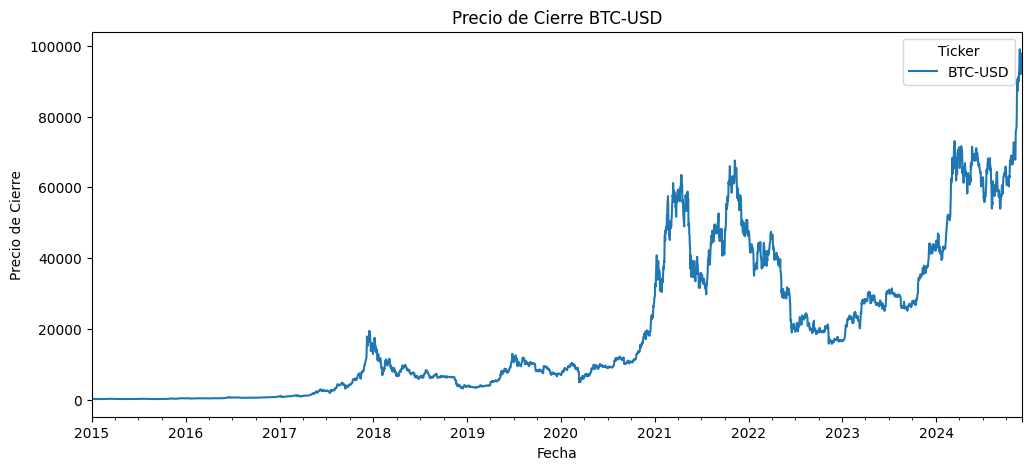

In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar datos de BTC-USD
btc_data = yf.download('BTC-USD', start='2015-01-01', end='2024-12-01', interval='1d')
btc_data['Close'].plot(figsize=(12, 5), title="Precio de Cierre BTC-USD", xlabel="Fecha", ylabel="Precio de Cierre")
plt.show()


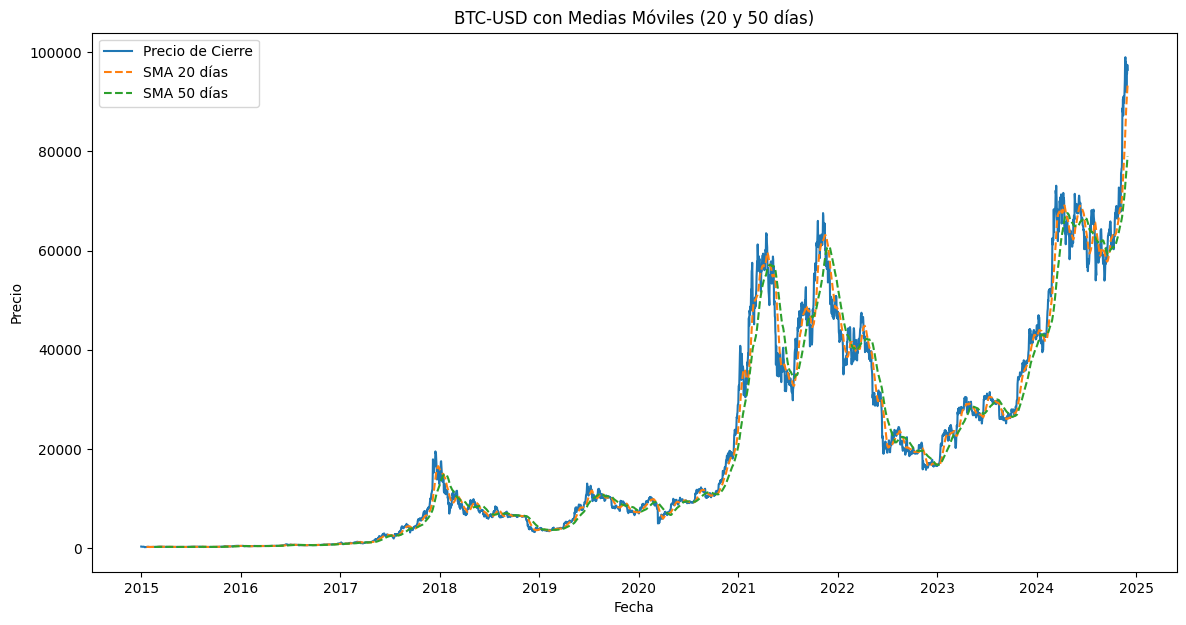

In [6]:
btc_data['SMA_20'] = btc_data['Close'].rolling(window=20).mean()
btc_data['SMA_50'] = btc_data['Close'].rolling(window=50).mean()

# Graficar las medias móviles con el precio
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label="Precio de Cierre")
plt.plot(btc_data['SMA_20'], label="SMA 20 días", linestyle="--")
plt.plot(btc_data['SMA_50'], label="SMA 50 días", linestyle="--")
plt.title("BTC-USD con Medias Móviles (20 y 50 días)")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.show()


In [11]:
from scipy.signal import argrelextrema

# Detectar máximos y mínimos locales
btc_data['Max_Local'] = btc_data['Close'][argrelextrema(btc_data['Close'].values, comparator=np.greater, order=5)[0]]
btc_data['Min_Local'] = btc_data['Close'][argrelextrema(btc_data['Close'].values, comparator=np.less, order=5)[0]]

# Graficar máximos y mínimos locales
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label="Precio de Cierre", alpha=0.7)
plt.scatter(btc_data.index, btc_data['Max_Local'], label="Máximos Locales", color='green')
plt.scatter(btc_data.index, btc_data['Min_Local'], label="Mínimos Locales", color='red')
plt.title("BTC-USD con Máximos y Mínimos Locales")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.show()


KeyError: "None of [Index([   1,   25,   32,   44,   51,   61,   69,   94,  112,  127,\n       ...\n       3469, 3489, 3496, 3507, 3524, 3558, 3566, 3580, 3589, 3613],\n      dtype='int64', name='Ticker', length=233)] are in the [columns]"

In [10]:
print(btc_data.index)
btc_data.reset_index(inplace=True)
print(btc_data.columns)
filtered_data = btc_data.iloc[[1, 25, 32, 44, 51]]



RangeIndex(start=0, stop=3622, step=1)
MultiIndex([(    'index',        ''),
            (     'Date',        ''),
            ('Adj Close', 'BTC-USD'),
            (    'Close', 'BTC-USD'),
            (     'High', 'BTC-USD'),
            (      'Low', 'BTC-USD'),
            (     'Open', 'BTC-USD'),
            (   'Volume', 'BTC-USD'),
            (   'SMA_20',        ''),
            (   'SMA_50',        '')],
           names=['Price', 'Ticker'])


In [12]:
from scipy.signal import argrelextrema

# Máximos locales
max_idx = argrelextrema(btc_data['Close'].values, comparator=np.greater, order=5)[0]

# Si hay problemas con los índices, conviértelos en un DataFrame accesible:
btc_data['Max_Local'] = btc_data.iloc[max_idx]['Close'].values


ValueError: Length of values (233) does not match length of index (3622)